In [2]:
import sys
sys.path.append('../data_cleaning/lem_stem_functions')

from text_functions_init_ac import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


overall
5    0.452013
1    0.267035
4    0.134377
3    0.077411
2    0.069163
Name: proportion, dtype: float64

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


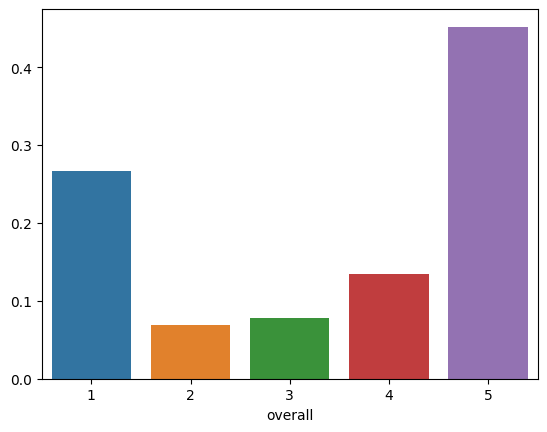

In [3]:
train = pd.read_csv('../../../data/processed/train.csv')
test = pd.read_csv('../../../data/processed/test.csv')

X_train = train.drop(columns='overall')
y_train = train['overall']
X_test = test.drop(columns='overall')
y_test = test['overall']

normalized_counts = y_train.value_counts(normalize=True)

display(y_train.value_counts(normalize=True))

sns.barplot(x=normalized_counts.index, y = normalized_counts.values)
plt.show()

We can see that the data is not very well balanced and may wish to consider over or undersampling the data. from the size of the data it may be best to undersample.

In [3]:
"""
With two methods of tokenizing ands 2 methods of vectorizing the text fields, that gives us 4 potential cobinations to test the regression.
To test the regression we can use the LinearRegression model to check for a linear regression and we can use the crossvalidation to verify
any detected linear relationships.

First though we must identify and preprocess our 4 types of data

This cell could take a few minutes to run.
"""

# Lemmatized data
X_lem_train = column_lemmatizer(X_train['reviewText'])
X_lem_test = column_lemmatizer(X_test['reviewText'])

# Stemmatized data
X_stem_train = column_stemmatizer(X_train['reviewText'])
X_stem_test = column_stemmatizer(X_test['reviewText'])

# Lemmatized CountVectorized data
X_lem_CV_train, X_lem_CV_test = count_vectorize_data(X_lem_train, X_lem_test)

# Lemmatized TFIDFVectorized data
X_lem_RFID_train, X_lem_RFID_test = tfidf_vectorize_data(X_lem_train, X_lem_test)

# Stemmatized CountVectorized data
X_stem_CV_train, X_stem_CV_test = count_vectorize_data(X_stem_train, X_stem_test)

# Stemmatized TFIDFVectorized data
X_stem_RFID_train, X_stem_RFID_test = tfidf_vectorize_data(X_stem_train, X_stem_test)

# Convert sparse matrix to dense array
X_lem_CV_train_dense = X_lem_CV_train.toarray()
X_lem_CV_test_dense = X_lem_CV_test.toarray()
X_lem_RFID_train_dense = X_lem_RFID_train.toarray()
X_lem_RFID_test_dense = X_lem_RFID_test.toarray()
X_stem_CV_train_dense = X_stem_CV_train.toarray()
X_stem_CV_test_dense = X_stem_CV_test.toarray()
X_stem_RFID_train_dense = X_stem_RFID_train.toarray()
X_stem_RFID_test_dense = X_stem_RFID_test.toarray()


# 1. Logistic Regression


In [4]:
# a) Lemmatized CountVectorized data

logistic_model = LogisticRegression(solver='saga')
logistic_model.fit(X_lem_CV_train, y_train)
y_pred_train_logistic_lem_cv = logistic_model.predict(X_lem_CV_train)
y_pred_test_logistic_lem_cv = logistic_model.predict(X_lem_CV_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_lem_cv)
logistic_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_lem_cv)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_lem_cv = accuracy_score(y_train, y_pred_train_logistic_lem_cv)
accuracy_test_logistic_lem_cv = accuracy_score(y_test, y_pred_test_logistic_lem_cv)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:\n", logistic_report_train_lem_cv_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:\n", logistic_report_test_lem_cv_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_logistic_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_logistic_lem_cv)



Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.69      0.81      0.87      0.74      0.84      0.70     11494
          2       0.45      0.04      1.00      0.07      0.20      0.04      2977
          3       0.43      0.12      0.99      0.18      0.34      0.11      3332
          4       0.45      0.24      0.96      0.31      0.48      0.21      5784
          5       0.70      0.91      0.67      0.79      0.78      0.63     19456

avg / total       0.62      0.67      0.81      0.62      0.68      0.51     43043


Logistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.79      0.86      0.73      0.83      0.68      4774
          2       0.25      0.02      0.99      0.04      0.15      0.02      1276
      

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
# b) Lemmatized TFIDFVectorized data

logistic_model = LogisticRegression(solver='saga')
logistic_model.fit(X_lem_RFID_train, y_train)
y_pred_train_logistic_lem_rfid = logistic_model.predict(X_lem_RFID_train)
y_pred_test_logistic_lem_rfid = logistic_model.predict(X_lem_RFID_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_lem_rfid)
logistic_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_lem_rfid)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_lem_rfid = accuracy_score(y_train, y_pred_train_logistic_lem_rfid)
accuracy_test_logistic_lem_rfid = accuracy_score(y_test, y_pred_test_logistic_lem_rfid)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", logistic_report_train_lem_rfid_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", logistic_report_test_lem_rfid_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_logistic_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_logistic_lem_rfid)

Logistic Regression - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.74      0.90      0.89      0.81      0.89      0.79     11494
          2       0.76      0.11      1.00      0.20      0.34      0.10      2977
          3       0.68      0.24      0.99      0.36      0.49      0.22      3332
          4       0.64      0.35      0.97      0.45      0.58      0.32      5784
          5       0.75      0.94      0.75      0.84      0.84      0.72     19456

avg / total       0.73      0.74      0.85      0.70      0.76      0.60     43043


Logistic Regression - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.84      0.86      0.75      0.85      0.72      4774
          2       0.34      0.04      0.99      0.07      0.20      0.04      1276


In [6]:
# c) Stemmatized CountVectorized data

logistic_model = LogisticRegression(solver='saga')
logistic_model.fit(X_stem_CV_train, y_train)
y_pred_train_logistic_stem_cv = logistic_model.predict(X_stem_CV_train)
y_pred_test_logistic_stem_cv = logistic_model.predict(X_stem_CV_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_stem_cv)
logistic_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_stem_cv)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_stem_cv = accuracy_score(y_train, y_pred_train_logistic_stem_cv)
accuracy_test_logistic_stem_cv = accuracy_score(y_test, y_pred_test_logistic_stem_cv)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (stem_cv) - imbalanced:\n", logistic_report_train_stem_cv_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (stem_cv) - imbalanced:\n", logistic_report_test_stem_cv_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_logistic_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_logistic_stem_cv)

Logistic Regression - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.69      0.81      0.87      0.74      0.84      0.70     11494
          2       0.42      0.04      1.00      0.08      0.21      0.04      2977
          3       0.42      0.12      0.99      0.19      0.35      0.11      3332
          4       0.45      0.24      0.95      0.31      0.48      0.21      5784
          5       0.70      0.90      0.68      0.79      0.78      0.63     19456

avg / total       0.62      0.67      0.81      0.62      0.68      0.51     43043


Logistic Regression - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.80      0.86      0.73      0.83      0.68      4774
          2       0.20      0.02      0.99      0.04      0.14      0.02      1276
    

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [7]:
# d) Stemmatized TFIDFVectorized data

logistic_model = LogisticRegression(solver='saga')
logistic_model.fit(X_stem_RFID_train, y_train)
y_pred_train_logistic_stem_rfid = logistic_model.predict(X_stem_RFID_train)
y_pred_test_logistic_stem_rfid = logistic_model.predict(X_stem_RFID_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic_stem_rfid)
logistic_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic_stem_rfid)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic_stem_rfid = accuracy_score(y_train, y_pred_train_logistic_stem_rfid)
accuracy_test_logistic_stem_rfid = accuracy_score(y_test, y_pred_test_logistic_stem_rfid)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", logistic_report_train_stem_rfid_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", logistic_report_test_stem_rfid_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_logistic_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_logistic_stem_rfid)

Logistic Regression - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.73      0.88      0.88      0.80      0.88      0.78     11494
          2       0.67      0.10      1.00      0.17      0.31      0.09      2977
          3       0.62      0.22      0.99      0.32      0.46      0.20      3332
          4       0.61      0.33      0.97      0.43      0.56      0.30      5784
          5       0.74      0.93      0.74      0.83      0.83      0.70     19456

avg / total       0.71      0.73      0.84      0.68      0.74      0.59     43043


Logistic Regression - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.83      0.86      0.74      0.85      0.71      4774
          2       0.32      0.04      0.99      0.07      0.20      0.04      127

## Summary - Logistic Regression

In [8]:
# a) Lemmatized CountVectorized data
logistic_report_train_lem_cv_imbalanced_last = [accuracy_train_logistic_lem_cv*100] + [float(value) for value in logistic_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
logistic_report_test_lem_cv_imbalanced_last = [accuracy_test_logistic_lem_cv*100] + [float(value) for value in logistic_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_lem_cv_imbalanced = pd.DataFrame([logistic_report_train_lem_cv_imbalanced_last, logistic_report_test_lem_cv_imbalanced_last], columns=column_names)
final_logistic_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_logistic_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_logistic_report_lem_cv_imbalanced = final_logistic_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
logistic_report_train_lem_rfid_imbalanced_last = [accuracy_train_logistic_lem_rfid*100] + [float(value) for value in logistic_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_lem_rfid_imbalanced_last = [accuracy_test_logistic_lem_rfid*100] + [float(value) for value in logistic_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_lem_rfid_imbalanced = pd.DataFrame([logistic_report_train_lem_rfid_imbalanced_last, logistic_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_logistic_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_logistic_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_logistic_report_lem_rfid_imbalanced = final_logistic_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
logistic_report_train_stem_cv_imbalanced_last = [accuracy_train_logistic_stem_cv*100] + [float(value) for value in logistic_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_stem_cv_imbalanced_last = [accuracy_test_logistic_stem_cv*100] + [float(value) for value in logistic_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_stem_cv_imbalanced = pd.DataFrame([logistic_report_train_stem_cv_imbalanced_last, logistic_report_test_stem_cv_imbalanced_last], columns=column_names)
final_logistic_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_logistic_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_logistic_report_stem_cv_imbalanced = final_logistic_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
logistic_report_train_stem_rfid_imbalanced_last = [accuracy_train_logistic_stem_rfid*100]+ [float(value) for value in logistic_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
logistic_report_test_stem_rfid_imbalanced_last = [accuracy_test_logistic_stem_rfid*100] + [float(value) for value in logistic_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_logistic_report_stem_rfid_imbalanced = pd.DataFrame([logistic_report_train_stem_rfid_imbalanced_last, logistic_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_logistic_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_logistic_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_logistic_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_logistic_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_logistic_report_stem_rfid_imbalanced = final_logistic_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Logistic Regression

In [9]:
final_logistic_report = pd.concat([final_logistic_report_lem_cv_imbalanced,
                    final_logistic_report_lem_rfid_imbalanced,
                    final_logistic_report_stem_cv_imbalanced,
                    final_logistic_report_stem_rfid_imbalanced])

final_logistic_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,66.998118,0.62,0.67,0.81,0.62,0.68,0.51,43043.0
Lemmatized Count Vectorized,Test,64.899442,0.58,0.65,0.80,0.59,0.66,0.48,18447.0
Lemmatized TFIDF Vectorized,Train,73.881932,0.73,0.74,0.85,0.70,0.76,0.60,43043.0
Lemmatized TFIDF Vectorized,Test,66.840137,0.61,0.67,0.82,0.61,0.68,0.51,18447.0
Stemmatized Count Vectorized,Train,66.944683,0.62,0.67,0.81,0.62,0.68,0.51,43043.0
Stemmatized Count Vectorized,Test,64.834390,0.58,0.65,0.80,0.59,0.66,0.49,18447.0
Stemmatized TFIDF Vectorized,Train,72.525149,0.71,0.73,0.84,0.68,0.74,0.59,43043.0
Stemmatized TFIDF Vectorized,Test,66.466092,0.60,0.66,0.82,0.61,0.68,0.51,18447.0


### Confusion Matrix for Logistic Regression

[[3792   28   75  126  753]
 [ 684   29   51  110  402]
 [ 453   28  105  281  610]
 [ 246   12   71  568 1683]
 [ 500   20   65  277 7478]]
[[4009   42   88   94  541]
 [ 720   50   75   89  342]
 [ 481   30  155  245  566]
 [ 251   10   87  572 1660]
 [ 432   16   48  300 7544]]
[[3810   31   80  138  715]
 [ 702   25   60  114  375]
 [ 453   29  112  290  593]
 [ 236   16   79  579 1670]
 [ 516   22   62  306 7434]]
[[3979   53   77  107  558]
 [ 731   51   88   91  315]
 [ 500   33  153  239  552]
 [ 251   10   87  575 1657]
 [ 466   14   60  297 7503]]


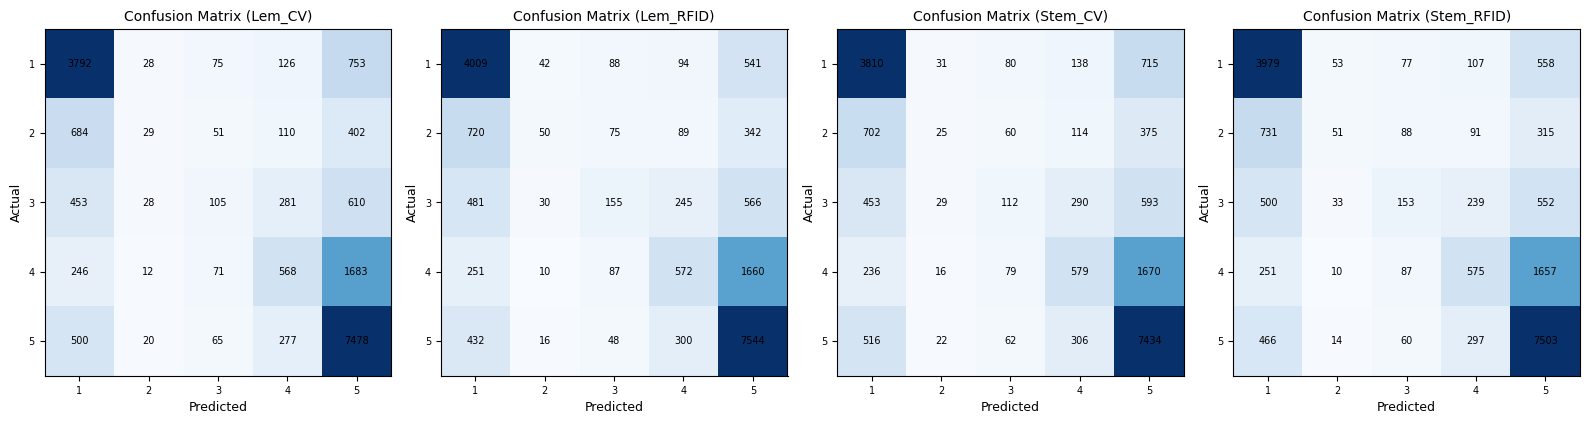

Lem_TFIDF: Train Accuracy - 0.7388, Test Accuracy - 0.6684
Stem_TFIDF: Train Accuracy - 0.7253, Test Accuracy - 0.6647
Lem_CV: Train Accuracy - 0.6700, Test Accuracy - 0.6490
Stem_CV: Train Accuracy - 0.6694, Test Accuracy - 0.6483


In [10]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_logistic_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/LRInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_logistic_lem_cv, 'Test': accuracy_test_logistic_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_logistic_lem_rfid, 'Test': accuracy_test_logistic_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_logistic_stem_cv, 'Test': accuracy_test_logistic_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_logistic_stem_rfid, 'Test': accuracy_test_logistic_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 2. Support Vector Machine (SVM)

In [11]:
# a) Lemmatized CountVectorized data

# SVM model
svm_model = SVC()
svm_model.fit(X_lem_CV_train, y_train)
y_pred_train_svm_lem_cv = svm_model.predict(X_lem_CV_train)
y_pred_test_svm_lem_cv = svm_model.predict(X_lem_CV_test)

# SVM classification reports and accuracy scores
svm_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_lem_cv)
svm_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_lem_cv)
accuracy_train_svm_lem_cv = accuracy_score(y_train, y_pred_train_svm_lem_cv)
accuracy_test_svm_lem_cv = accuracy_score(y_test, y_pred_test_svm_lem_cv)

# Print results
print("SVM - Classification Report: Train Data (lem_cv) - imbalanced:\n", svm_report_train_lem_cv_imbalanced)
print("\nSVM - Classification Report: Test Data (lem_cv) - imbalanced:\n", svm_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_svm_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_svm_lem_cv)

SVM - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.91      0.90      0.83      0.90      0.82     11494
          2       1.00      0.25      1.00      0.40      0.50      0.23      2977
          3       0.94      0.37      1.00      0.53      0.61      0.35      3332
          4       0.89      0.39      0.99      0.54      0.62      0.36      5784
          5       0.76      0.97      0.75      0.85      0.85      0.74     19456

avg / total       0.81      0.78      0.86      0.75      0.79      0.65     43043


SVM - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.81      0.86      0.73      0.84      0.70      4774
          2       0.55      0.00      1.00      0.01      0.07      0.00      1276
          3       0.39      0.04      

In [12]:
# b) Lemmatized TFIDFVectorized data

# SVM model
svm_model = SVC()
svm_model.fit(X_lem_RFID_train, y_train)
y_pred_train_svm_lem_rfid = svm_model.predict(X_lem_RFID_train)
y_pred_test_svm_lem_rfid = svm_model.predict(X_lem_RFID_test)

# SVM classification reports and accuracy scores
svm_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_lem_rfid)
svm_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_lem_rfid)
accuracy_train_svm_lem_rfid = accuracy_score(y_train, y_pred_train_svm_lem_rfid)
accuracy_test_svm_lem_rfid = accuracy_score(y_test, y_pred_test_svm_lem_rfid)

# Print results
print("SVM - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", svm_report_train_lem_rfid_imbalanced)
print("\nSVM - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", svm_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_svm_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_svm_lem_rfid)

SVM - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.85      0.98      0.94      0.91      0.96      0.92     11494
          2       1.00      0.48      1.00      0.65      0.69      0.46      2977
          3       0.98      0.68      1.00      0.80      0.82      0.65      3332
          4       0.96      0.67      1.00      0.79      0.82      0.64      5784
          5       0.87      0.99      0.88      0.93      0.93      0.88     19456

avg / total       0.90      0.88      0.93      0.88      0.90      0.81     43043


SVM - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.86      0.86      0.76      0.86      0.73      4774
          2       0.52      0.01      1.00      0.02      0.10      0.01      1276
          3       0.42      0.07

In [13]:
# c) Stemmatized CountVectorized data

# SVM model
svm_model = SVC()
svm_model.fit(X_stem_CV_train, y_train)
y_pred_train_svm_stem_cv = svm_model.predict(X_stem_CV_train)
y_pred_test_svm_stem_cv = svm_model.predict(X_stem_CV_test)

# SVM classification reports and accuracy scores
svm_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_stem_cv)
svm_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_stem_cv)
accuracy_train_svm_stem_cv = accuracy_score(y_train, y_pred_train_svm_stem_cv)
accuracy_test_svm_stem_cv = accuracy_score(y_test, y_pred_test_svm_stem_cv)

# Print results
print("SVM - Classification Report: Train Data (stem_cv) - imbalanced:\n", svm_report_train_stem_cv_imbalanced)
print("\nSVM - Classification Report: Test Data (stem_cv) - imbalanced:\n", svm_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_svm_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_svm_stem_cv)

SVM - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.91      0.89      0.82      0.90      0.81     11494
          2       1.00      0.24      1.00      0.39      0.49      0.22      2977
          3       0.93      0.36      1.00      0.52      0.60      0.34      3332
          4       0.89      0.37      0.99      0.52      0.61      0.35      5784
          5       0.76      0.97      0.74      0.85      0.85      0.73     19456

avg / total       0.80      0.77      0.85      0.74      0.79      0.64     43043


SVM - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.81      0.86      0.73      0.84      0.70      4774
          2       0.43      0.00      1.00      0.01      0.07      0.00      1276
          3       0.36      0.04    

In [14]:
# d) Stemmatized TFIDFVectorized data

# SVM model
svm_model = SVC()
svm_model.fit(X_stem_RFID_train, y_train)
y_pred_train_svm_stem_rfid = svm_model.predict(X_stem_RFID_train)
y_pred_test_svm_stem_rfid = svm_model.predict(X_stem_RFID_test)

# SVM classification reports and accuracy scores
svm_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_svm_stem_rfid)
svm_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_svm_stem_rfid)
accuracy_train_svm_stem_rfid = accuracy_score(y_train, y_pred_train_svm_stem_rfid)
accuracy_test_svm_stem_rfid = accuracy_score(y_test, y_pred_test_svm_stem_rfid)

# Print results
print("SVM - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", svm_report_train_stem_rfid_imbalanced)
print("\nSVM - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", svm_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_svm_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_svm_stem_rfid)


SVM - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.84      0.97      0.93      0.90      0.95      0.91     11494
          2       1.00      0.41      1.00      0.58      0.64      0.39      2977
          3       0.98      0.63      1.00      0.77      0.80      0.61      3332
          4       0.95      0.64      1.00      0.76      0.80      0.61      5784
          5       0.86      0.99      0.87      0.92      0.93      0.87     19456

avg / total       0.88      0.87      0.92      0.86      0.89      0.79     43043


SVM - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.85      0.85      0.75      0.85      0.73      4774
          2       0.56      0.01      1.00      0.02      0.09      0.01      1276
          3       0.44      0.

## Summary - Support Vector Machine

In [15]:
# a) Lemmatized CountVectorized data
svm_report_train_lem_cv_imbalanced_last = [accuracy_train_svm_lem_cv*100] + [float(value) for value in svm_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
svm_report_test_lem_cv_imbalanced_last = [accuracy_test_svm_lem_cv*100] + [float(value) for value in svm_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_lem_cv_imbalanced = pd.DataFrame([svm_report_train_lem_cv_imbalanced_last, svm_report_test_lem_cv_imbalanced_last], columns=column_names)
final_svm_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_svm_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_svm_report_lem_cv_imbalanced = final_svm_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
svm_report_train_lem_rfid_imbalanced_last = [accuracy_train_svm_lem_rfid*100] + [float(value) for value in svm_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_lem_rfid_imbalanced_last = [accuracy_test_svm_lem_rfid*100] + [float(value) for value in svm_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_lem_rfid_imbalanced = pd.DataFrame([svm_report_train_lem_rfid_imbalanced_last, svm_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_svm_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_svm_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_svm_report_lem_rfid_imbalanced = final_svm_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
svm_report_train_stem_cv_imbalanced_last = [accuracy_train_svm_stem_cv*100] + [float(value) for value in svm_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_stem_cv_imbalanced_last = [accuracy_test_svm_stem_cv*100] + [float(value) for value in svm_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_stem_cv_imbalanced = pd.DataFrame([svm_report_train_stem_cv_imbalanced_last, svm_report_test_stem_cv_imbalanced_last], columns=column_names)
final_svm_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_svm_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_svm_report_stem_cv_imbalanced = final_svm_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
svm_report_train_stem_rfid_imbalanced_last = [accuracy_train_svm_stem_rfid*100]+ [float(value) for value in svm_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
svm_report_test_stem_rfid_imbalanced_last = [accuracy_test_svm_stem_rfid*100] + [float(value) for value in svm_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_svm_report_stem_rfid_imbalanced = pd.DataFrame([svm_report_train_stem_rfid_imbalanced_last, svm_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_svm_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_svm_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_svm_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_svm_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_svm_report_stem_rfid_imbalanced = final_svm_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for Support Vector Machine (SVM)

In [16]:
final_svm_report = pd.concat([final_svm_report_lem_cv_imbalanced,
                    final_svm_report_lem_rfid_imbalanced,
                    final_svm_report_stem_cv_imbalanced,
                    final_svm_report_stem_rfid_imbalanced])

final_svm_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,77.963897,0.81,0.78,0.86,0.75,0.79,0.65,43043.0
Lemmatized Count Vectorized,Test,65.045807,0.61,0.65,0.77,0.57,0.62,0.45,18447.0
Lemmatized TFIDF Vectorized,Train,88.471993,0.90,0.88,0.93,0.88,0.90,0.81,43043.0
Lemmatized TFIDF Vectorized,Test,67.019027,0.62,0.67,0.80,0.59,0.65,0.49,18447.0
Stemmatized Count Vectorized,Train,77.276212,0.80,0.77,0.85,0.74,0.79,0.64,43043.0
Stemmatized Count Vectorized,Test,64.937388,0.59,0.65,0.77,0.56,0.61,0.45,18447.0
Stemmatized TFIDF Vectorized,Train,87.098948,0.88,0.87,0.92,0.86,0.89,0.79,43043.0
Stemmatized TFIDF Vectorized,Test,66.921451,0.63,0.67,0.80,0.59,0.65,0.49,18447.0


### Confusion Matrix for Support Vector Machine (SVM)

[[3890    3   21   37  823]
 [ 729    6   33   35  473]
 [ 503    1   63   88  822]
 [ 254    0   34  243 2049]
 [ 459    1   10   73 7797]]
[[4084    3   43   57  587]
 [ 775   12   51   56  382]
 [ 524    3  107  156  687]
 [ 251    0   42  355 1932]
 [ 398    5   14  118 7805]]
[[3885    2   21   41  825]
 [ 728    6   31   41  470]
 [ 510    2   58   79  828]
 [ 256    2   41  233 2048]
 [ 447    2   12   82 7797]]
[[4071    3   38   64  598]
 [ 779   10   53   57  377]
 [ 536    2  120  156  663]
 [ 268    1   38  372 1901]
 [ 429    2   22  115 7772]]


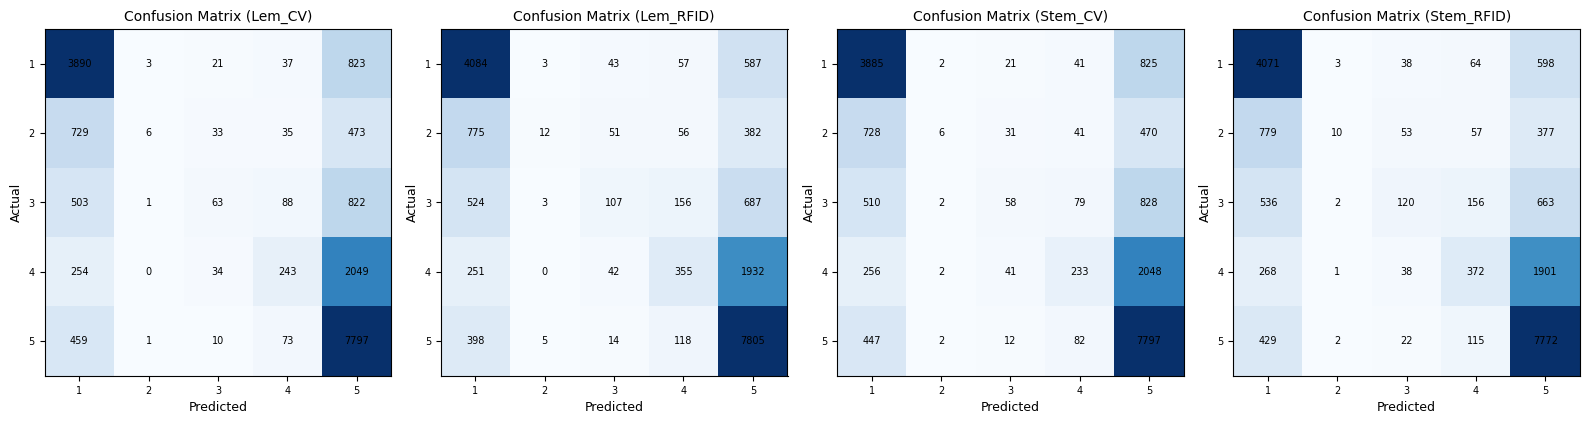

Lem_TFIDF: Train Accuracy - 0.8847, Test Accuracy - 0.6702
Stem_TFIDF: Train Accuracy - 0.8710, Test Accuracy - 0.6692
Lem_CV: Train Accuracy - 0.7796, Test Accuracy - 0.6505
Stem_CV: Train Accuracy - 0.7728, Test Accuracy - 0.6494


In [17]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_svm_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/SVMInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_svm_lem_cv, 'Test': accuracy_test_svm_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_svm_lem_rfid, 'Test': accuracy_test_svm_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_svm_stem_cv, 'Test': accuracy_test_svm_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_svm_stem_rfid, 'Test': accuracy_test_svm_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 3. k-Nearest Neighbors (kNN)

In [18]:
# a) KNN on Lemmatized CountVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_lem_CV_train, y_train)

y_pred_train_knn_lem_cv = knn_model.predict(X_lem_CV_train)
y_pred_test_knn_lem_cv = knn_model.predict(X_lem_CV_test)

knn_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_lem_cv)
knn_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_lem_cv)

accuracy_train_knn_lem_cv = accuracy_score(y_train, y_pred_train_knn_lem_cv)
accuracy_test_knn_lem_cv = accuracy_score(y_test, y_pred_test_knn_lem_cv)

print("KNN - Classification Report: Train Data (lem_cv) - imbalanced:\n", knn_report_train_lem_cv_imbalanced)
print("\nKNN - Classification Report: Test Data (lem_cv) - imbalanced:\n", knn_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_knn_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_knn_lem_cv)

KNN - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.61      0.78      0.82      0.68      0.80      0.63     11494
          2       0.57      0.14      0.99      0.22      0.37      0.12      2977
          3       0.55      0.17      0.99      0.26      0.41      0.16      3332
          4       0.57      0.24      0.97      0.34      0.48      0.22      5784
          5       0.68      0.85      0.67      0.75      0.75      0.58     19456

avg / total       0.63      0.65      0.80      0.60      0.68      0.48     43043


KNN - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.48      0.61      0.77      0.54      0.69      0.47      4774
          2       0.11      0.02      0.99      0.03      0.13      0.02      1276
          3       0.14      0.04      

In [19]:
# b) KNN on Lemmatized TFIDFVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_lem_RFID_train, y_train)

y_pred_train_knn_lem_rfid = knn_model.predict(X_lem_RFID_train)
y_pred_test_knn_lem_rfid = knn_model.predict(X_lem_RFID_test)

knn_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_lem_rfid)
knn_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_lem_rfid)

accuracy_train_knn_lem_rfid = accuracy_score(y_train, y_pred_train_knn_lem_rfid)
accuracy_test_knn_lem_rfid = accuracy_score(y_test, y_pred_test_knn_lem_rfid)

print("KNN - Classification Report: Train Data (lem_tfidf) - imbalanced:\n", knn_report_train_lem_rfid_imbalanced)
print("\nKNN - Classification Report: Test Data (lem_tfidf) - imbalanced:\n", knn_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_knn_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_knn_lem_rfid)

KNN - Classification Report: Train Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.28      0.99      0.08      0.44      0.28      0.09     11494
          2       0.56      0.01      1.00      0.02      0.09      0.01      2977
          3       0.57      0.03      1.00      0.07      0.19      0.03      3332
          4       0.58      0.01      1.00      0.02      0.11      0.01      5784
          5       0.84      0.10      0.98      0.18      0.31      0.09     19456

avg / total       0.61      0.31      0.75      0.21      0.25      0.07     43043


KNN - Classification Report: Test Data (lem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.27      0.99      0.06      0.42      0.25      0.07      4774
          2       0.15      0.00      1.00      0.00      0.05      0.00      1276
          3       0.20      0.01

In [20]:
# c) KNN on Stemmatized CountVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_stem_CV_train, y_train)

y_pred_train_knn_stem_cv = knn_model.predict(X_stem_CV_train)
y_pred_test_knn_stem_cv = knn_model.predict(X_stem_CV_test)

knn_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_stem_cv)
knn_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_stem_cv)

accuracy_train_knn_stem_cv = accuracy_score(y_train, y_pred_train_knn_stem_cv)
accuracy_test_knn_stem_cv = accuracy_score(y_test, y_pred_test_knn_stem_cv)

print("KNN - Classification Report: Train Data (stem_cv) - imbalanced:\n", knn_report_train_stem_cv_imbalanced)
print("\nKNN - Classification Report: Test Data (stem_cv) - imbalanced:\n", knn_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_knn_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_knn_stem_cv)

KNN - Classification Report: Train Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.62      0.78      0.83      0.69      0.80      0.64     11494
          2       0.59      0.14      0.99      0.23      0.38      0.13      2977
          3       0.54      0.17      0.99      0.26      0.42      0.16      3332
          4       0.56      0.24      0.97      0.34      0.49      0.22      5784
          5       0.68      0.86      0.67      0.76      0.76      0.59     19456

avg / total       0.63      0.65      0.80      0.61      0.68      0.49     43043


KNN - Classification Report: Test Data (stem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.50      0.62      0.79      0.56      0.70      0.48      4774
          2       0.12      0.03      0.99      0.04      0.16      0.02      1276
          3       0.15      0.05    

In [21]:
# d) KNN on Stemmatized TFIDFVectorized data

# Set k to the desired number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can adjust n_neighbors as needed
knn_model.fit(X_stem_RFID_train, y_train)

y_pred_train_knn_stem_rfid = knn_model.predict(X_stem_RFID_train)
y_pred_test_knn_stem_rfid = knn_model.predict(X_stem_RFID_test)

knn_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_knn_stem_rfid)
knn_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_knn_stem_rfid)

accuracy_train_knn_stem_rfid = accuracy_score(y_train, y_pred_train_knn_stem_rfid)
accuracy_test_knn_stem_rfid = accuracy_score(y_test, y_pred_test_knn_stem_rfid)

print("KNN - Classification Report: Train Data (stem_tfidf) - imbalanced:\n", knn_report_train_stem_rfid_imbalanced)
print("\nKNN - Classification Report: Test Data (stem_tfidf) - imbalanced:\n", knn_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_knn_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_knn_stem_rfid)

KNN - Classification Report: Train Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.29      0.99      0.11      0.45      0.33      0.12     11494
          2       0.59      0.01      1.00      0.02      0.11      0.01      2977
          3       0.53      0.04      1.00      0.08      0.21      0.04      3332
          4       0.61      0.02      1.00      0.04      0.14      0.02      5784
          5       0.83      0.13      0.98      0.22      0.36      0.12     19456

avg / total       0.62      0.33      0.75      0.23      0.29      0.09     43043


KNN - Classification Report: Test Data (stem_tfidf) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.27      0.98      0.08      0.42      0.28      0.09      4774
          2       0.08      0.00      1.00      0.00      0.04      0.00      1276
          3       0.19      0.

## Summary - k-Nearest Neighbors

In [22]:
# a) Lemmatized CountVectorized data
knn_report_train_lem_cv_imbalanced_last = [accuracy_train_knn_lem_cv*100] + [float(value) for value in knn_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
knn_report_test_lem_cv_imbalanced_last = [accuracy_test_knn_lem_cv*100] + [float(value) for value in knn_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_lem_cv_imbalanced = pd.DataFrame([knn_report_train_lem_cv_imbalanced_last, knn_report_test_lem_cv_imbalanced_last], columns=column_names)
final_knn_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_knn_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_knn_report_lem_cv_imbalanced = final_knn_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
knn_report_train_lem_rfid_imbalanced_last = [accuracy_train_knn_lem_rfid*100] + [float(value) for value in knn_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_lem_rfid_imbalanced_last = [accuracy_test_knn_lem_rfid*100] + [float(value) for value in knn_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_lem_rfid_imbalanced = pd.DataFrame([knn_report_train_lem_rfid_imbalanced_last, knn_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_knn_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_knn_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_knn_report_lem_rfid_imbalanced = final_knn_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
knn_report_train_stem_cv_imbalanced_last = [accuracy_train_knn_stem_cv*100] + [float(value) for value in knn_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_stem_cv_imbalanced_last = [accuracy_test_knn_stem_cv*100] + [float(value) for value in knn_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_stem_cv_imbalanced = pd.DataFrame([knn_report_train_stem_cv_imbalanced_last, knn_report_test_stem_cv_imbalanced_last], columns=column_names)
final_knn_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_knn_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_knn_report_stem_cv_imbalanced = final_knn_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
knn_report_train_stem_rfid_imbalanced_last = [accuracy_train_knn_stem_rfid*100]+ [float(value) for value in knn_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
knn_report_test_stem_rfid_imbalanced_last = [accuracy_test_knn_stem_rfid*100] + [float(value) for value in knn_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_knn_report_stem_rfid_imbalanced = pd.DataFrame([knn_report_train_stem_rfid_imbalanced_last, knn_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_knn_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_knn_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_knn_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_knn_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_knn_report_stem_rfid_imbalanced = final_knn_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for k-Nearest Neighbors (kNN)

In [23]:
final_knn_report = pd.concat([final_knn_report_lem_cv_imbalanced,
                    final_knn_report_lem_rfid_imbalanced,
                    final_knn_report_stem_cv_imbalanced,
                    final_knn_report_stem_rfid_imbalanced])

final_knn_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,64.579606,0.63,0.65,0.80,0.60,0.68,0.48,43043.0
Lemmatized Count Vectorized,Test,51.661517,0.44,0.52,0.73,0.46,0.53,0.33,18447.0
Lemmatized TFIDF Vectorized,Train,31.410450,0.61,0.31,0.75,0.21,0.25,0.07,43043.0
Lemmatized TFIDF Vectorized,Test,28.991164,0.48,0.29,0.75,0.17,0.20,0.05,18447.0
Stemmatized Count Vectorized,Train,65.162744,0.63,0.65,0.80,0.61,0.68,0.49,43043.0
Stemmatized Count Vectorized,Test,52.501762,0.45,0.53,0.74,0.47,0.54,0.34,18447.0
Stemmatized TFIDF Vectorized,Train,32.927538,0.62,0.33,0.75,0.23,0.29,0.09,43043.0
Stemmatized TFIDF Vectorized,Test,29.755516,0.47,0.30,0.75,0.19,0.23,0.06,18447.0


### Confusion Matrix for k-Nearest Neighbors (kNN)

[[2934   54   96  150 1540]
 [ 598   23   42   68  545]
 [ 545   33   55  103  741]
 [ 545   33   79  219 1704]
 [1434   76  132  399 6299]]
[[4704    4   12    0   54]
 [1250    3    3    1   19]
 [1432    3   10    1   31]
 [2472    4    7    9   88]
 [7675    6   19   18  622]]
[[2953   88  112  146 1475]
 [ 558   33   54   68  563]
 [ 548   32   69  106  722]
 [ 533   42   79  210 1716]
 [1272   79  135  434 6420]]
[[4660    7   18    4   85]
 [1237    2    9    1   27]
 [1410    4   13    3   47]
 [2423    3    6   14  134]
 [7486   10   21   23  800]]


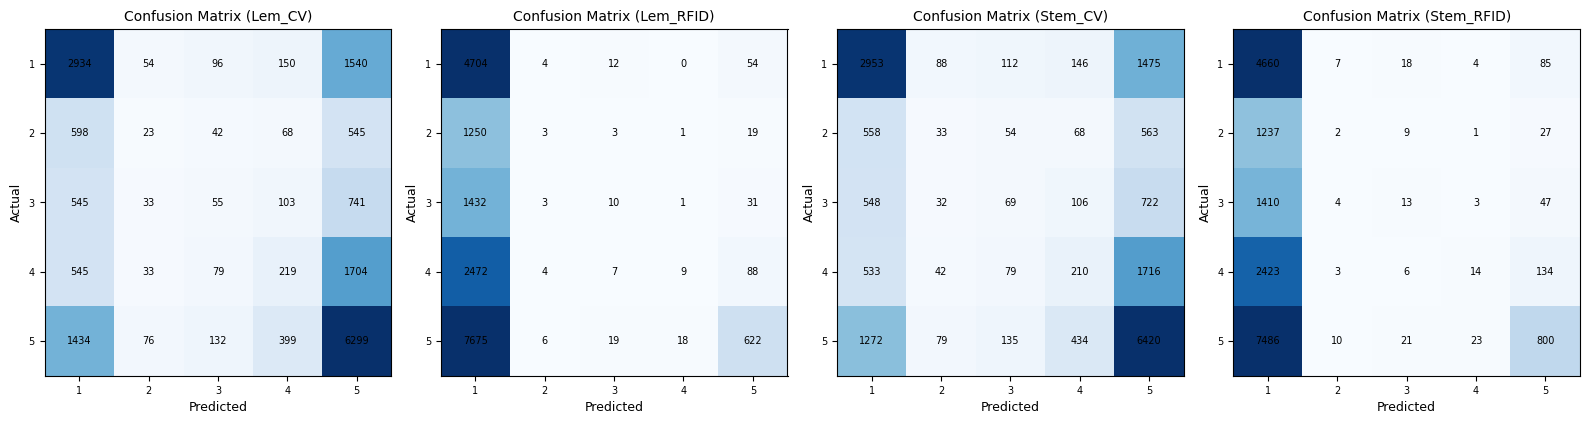

Stem_CV: Train Accuracy - 0.6516, Test Accuracy - 0.5250
Lem_CV: Train Accuracy - 0.6458, Test Accuracy - 0.5166
Stem_TFIDF: Train Accuracy - 0.3293, Test Accuracy - 0.2976
Lem_TFIDF: Train Accuracy - 0.3141, Test Accuracy - 0.2899


In [24]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_knn_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/KNNInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_knn_lem_cv, 'Test': accuracy_test_knn_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_knn_lem_rfid, 'Test': accuracy_test_knn_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_knn_stem_cv, 'Test': accuracy_test_knn_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_knn_stem_rfid, 'Test': accuracy_test_knn_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 4. Decision Tree Classifier

In [25]:
# a) Decision Tree on Lemmatized CountVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_lem_CV_train, y_train)
y_pred_train_dt_lem_cv = dt_model.predict(X_lem_CV_train)
y_pred_test_dt_lem_cv = dt_model.predict(X_lem_CV_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_lem_cv)
dt_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_lem_cv)
accuracy_train_dt_lem_cv = accuracy_score(y_train, y_pred_train_dt_lem_cv)
accuracy_test_dt_lem_cv = accuracy_score(y_test, y_pred_test_dt_lem_cv)

# Print results
print("Decision Tree - Classification Report: Train Data (lem_cv):\n", dt_report_train_lem_cv_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (lem_cv):\n", dt_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_dt_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_dt_lem_cv)

Decision Tree - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.57      0.61      0.84      0.59      0.72      0.50      4774
          2       0.14      0.11      0.95      0.12      0.32      0.09      1276
          3       0.14      0.11      0.94  

In [26]:
# b) Decision Tree on Lemmatized TFIDFVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_lem_RFID_train, y_train)
y_pred_train_dt_lem_rfid = dt_model.predict(X_lem_RFID_train)
y_pred_test_dt_lem_rfid = dt_model.predict(X_lem_RFID_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_lem_rfid)
dt_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_lem_rfid)
accuracy_train_dt_lem_rfid = accuracy_score(y_train, y_pred_train_dt_lem_rfid)
accuracy_test_dt_lem_rfid = accuracy_score(y_test, y_pred_test_dt_lem_rfid)

# Print results
print("Decision Tree - Classification Report: Train Data (lem_tfidf):\n", dt_report_train_lem_rfid_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (lem_tfidf):\n", dt_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_dt_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_dt_lem_rfid)

Decision Tree - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.60      0.84      0.58      0.71      0.49      4774
          2       0.12      0.09      0.95      0.11      0.30      0.08      1276
          3       0.16      0.14      

In [27]:
# c) Decision Tree on Stemmatized CountVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_stem_CV_train, y_train)
y_pred_train_dt_stem_cv = dt_model.predict(X_stem_CV_train)
y_pred_test_dt_stem_cv = dt_model.predict(X_stem_CV_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_stem_cv)
dt_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_stem_cv)
accuracy_train_dt_stem_cv = accuracy_score(y_train, y_pred_train_dt_stem_cv)
accuracy_test_dt_stem_cv = accuracy_score(y_test, y_pred_test_dt_stem_cv)

# Print results
print("Decision Tree - Classification Report: Train Data (stem_cv):\n", dt_report_train_stem_cv_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (stem_cv):\n", dt_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_dt_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_dt_stem_cv)

Decision Tree - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.60      0.83      0.58      0.71      0.49      4774
          2       0.13      0.10      0.95      0.11      0.31      0.09      1276
          3       0.17      0.13      0.94

In [28]:
# d) Decision Tree on Lemmatized TFIDFVectorized data

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_stem_RFID_train, y_train)
y_pred_train_dt_stem_rfid = dt_model.predict(X_stem_RFID_train)
y_pred_test_dt_stem_rfid = dt_model.predict(X_stem_RFID_test)

# Decision Tree classification reports and accuracy scores
dt_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_dt_stem_rfid)
dt_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_dt_stem_rfid)
accuracy_train_dt_stem_rfid = accuracy_score(y_train, y_pred_train_dt_stem_rfid)
accuracy_test_dt_stem_rfid = accuracy_score(y_test, y_pred_test_dt_stem_rfid)

# Print results
print("Decision Tree - Classification Report: Train Data (stem_tfidf):\n", dt_report_train_stem_rfid_imbalanced)
print("\nDecision Tree - Classification Report: Test Data (stem_tfidf):\n", dt_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_dt_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_dt_stem_rfid)

Decision Tree - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      1.00      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Decision Tree - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.56      0.58      0.84      0.57      0.70      0.48      4774
          2       0.11      0.09      0.95      0.10      0.30      0.08      1276
          3       0.14      0.12    

## Summary - Decision Tree

In [29]:
# a) Lemmatized CountVectorized data
dt_report_train_lem_cv_imbalanced_last = [accuracy_train_dt_lem_cv*100] + [float(value) for value in dt_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
dt_report_test_lem_cv_imbalanced_last = [accuracy_test_dt_lem_cv*100] + [float(value) for value in dt_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_lem_cv_imbalanced = pd.DataFrame([dt_report_train_lem_cv_imbalanced_last, dt_report_test_lem_cv_imbalanced_last], columns=column_names)
final_dt_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_dt_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_dt_report_lem_cv_imbalanced = final_dt_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
dt_report_train_lem_rfid_imbalanced_last = [accuracy_train_dt_lem_rfid*100] + [float(value) for value in dt_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_lem_rfid_imbalanced_last = [accuracy_test_dt_lem_rfid*100] + [float(value) for value in dt_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_lem_rfid_imbalanced = pd.DataFrame([dt_report_train_lem_rfid_imbalanced_last, dt_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_dt_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_dt_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_dt_report_lem_rfid_imbalanced = final_dt_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
dt_report_train_stem_cv_imbalanced_last = [accuracy_train_dt_stem_cv*100] + [float(value) for value in dt_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_stem_cv_imbalanced_last = [accuracy_test_dt_stem_cv*100] + [float(value) for value in dt_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_stem_cv_imbalanced = pd.DataFrame([dt_report_train_stem_cv_imbalanced_last, dt_report_test_stem_cv_imbalanced_last], columns=column_names)
final_dt_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_dt_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_dt_report_stem_cv_imbalanced = final_dt_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
dt_report_train_stem_rfid_imbalanced_last = [accuracy_train_dt_stem_rfid*100]+ [float(value) for value in dt_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
dt_report_test_stem_rfid_imbalanced_last = [accuracy_test_dt_stem_rfid*100] + [float(value) for value in dt_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_dt_report_stem_rfid_imbalanced = pd.DataFrame([dt_report_train_stem_rfid_imbalanced_last, dt_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_dt_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_dt_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_dt_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_dt_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_dt_report_stem_rfid_imbalanced = final_dt_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Decision Tree

In [30]:
final_dt_report = pd.concat([final_dt_report_lem_cv_imbalanced,
                    final_dt_report_lem_rfid_imbalanced,
                    final_dt_report_stem_cv_imbalanced,
                    final_dt_report_stem_rfid_imbalanced])

final_dt_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,99.881514,1.00,1.00,1.0,1.00,1.00,1.00,43043.0
Lemmatized Count Vectorized,Test,51.802461,0.50,0.52,0.8,0.51,0.61,0.39,18447.0
Lemmatized TFIDF Vectorized,Train,99.881514,1.00,1.00,1.0,1.00,1.00,1.00,43043.0
Lemmatized TFIDF Vectorized,Test,51.542256,0.50,0.52,0.8,0.50,0.61,0.38,18447.0
Stemmatized Count Vectorized,Train,99.869898,1.00,1.00,1.0,1.00,1.00,1.00,43043.0
Stemmatized Count Vectorized,Test,51.569361,0.50,0.52,0.8,0.51,0.61,0.39,18447.0
Stemmatized TFIDF Vectorized,Train,99.869898,1.00,1.00,1.0,1.00,1.00,1.00,43043.0
Stemmatized TFIDF Vectorized,Test,50.474332,0.49,0.50,0.8,0.50,0.60,0.38,18447.0


### Confusion Matrix for Decision Tree

[[2922  364  291  314  883]
 [ 510  139  114  158  355]
 [ 449  109  160  261  498]
 [ 374  124  198  594 1290]
 [ 889  259  368 1083 5741]]
[[2871  360  301  314  928]
 [ 510  118  114  167  367]
 [ 413  104  203  235  522]
 [ 386  144  249  540 1261]
 [ 933  244  397  990 5776]]
[[2884  373  266  352  899]
 [ 510  131  114  162  359]
 [ 436  100  195  247  499]
 [ 399  149  213  567 1252]
 [ 928  252  377 1047 5736]]
[[2790  363  330  324  967]
 [ 480  121  138  166  371]
 [ 424  133  184  234  502]
 [ 376  151  253  547 1253]
 [ 935  285  396 1055 5669]]


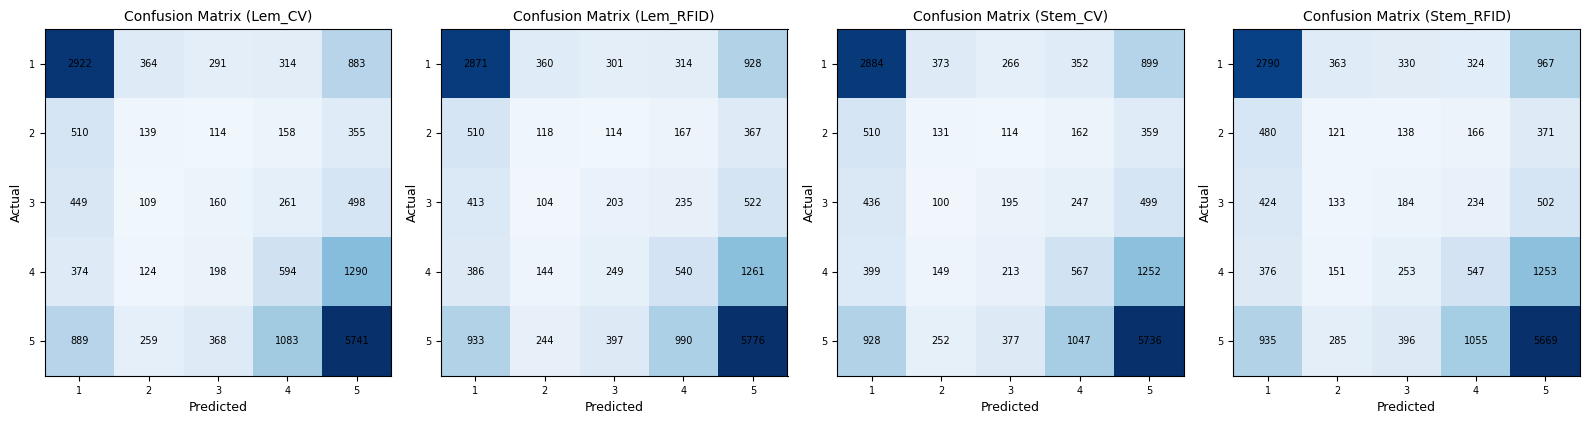

Lem_CV: Train Accuracy - 0.9988, Test Accuracy - 0.5180
Lem_TFIDF: Train Accuracy - 0.9988, Test Accuracy - 0.5154
Stem_CV: Train Accuracy - 0.9987, Test Accuracy - 0.5157
Stem_TFIDF: Train Accuracy - 0.9987, Test Accuracy - 0.5047


In [31]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_dt_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/DTInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_dt_lem_cv, 'Test': accuracy_test_dt_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_dt_lem_rfid, 'Test': accuracy_test_dt_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_dt_stem_cv, 'Test': accuracy_test_dt_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_dt_stem_rfid, 'Test': accuracy_test_dt_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 5. Random Forest Classifier

In [32]:
# a) Random Forest on Lemmatized CountVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_lem_CV_train, y_train)
y_pred_train_rf_lem_cv = rf_model.predict(X_lem_CV_train)
y_pred_test_rf_lem_cv = rf_model.predict(X_lem_CV_test)

# Random Forest classification reports and accuracy scores
rf_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_lem_cv)
rf_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_lem_cv)
accuracy_train_rf_lem_cv = accuracy_score(y_train, y_pred_train_rf_lem_cv)
accuracy_test_rf_lem_cv = accuracy_score(y_test, y_pred_test_rf_lem_cv)

# Print results
print("Random Forest - Classification Report: Train Data (lem_cv):\n", rf_report_train_lem_cv_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_cv):\n", rf_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_rf_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_rf_lem_cv)


Random Forest - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      0.99      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.79      0.87      0.73      0.83      0.68      4774
          2       0.87      0.02      1.00      0.03      0.13      0.01      1276
          3       0.72      0.02      1.00  

In [33]:
# b) Random Forest on Lemmatized TFIDFVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_lem_RFID_train, y_train)
y_pred_train_rf_lem_rfid = rf_model.predict(X_lem_RFID_train)
y_pred_test_rf_lem_rfid = rf_model.predict(X_lem_RFID_test)

# Random Forest classification reports and accuracy scores
rf_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_lem_rfid)
rf_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_lem_rfid)
accuracy_train_rf_lem_rfid = accuracy_score(y_train, y_pred_train_rf_lem_rfid)
accuracy_test_rf_lem_rfid = accuracy_score(y_test, y_pred_test_rf_lem_rfid)

# Print results
print("Random Forest - Classification Report: Train Data (lem_tfidf):\n", rf_report_train_lem_rfid_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_tfidf):\n", rf_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_rf_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_rf_lem_rfid)

Random Forest - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      0.99      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.77      0.87      0.73      0.82      0.67      4774
          2       0.86      0.01      1.00      0.03      0.12      0.01      1276
          3       0.90      0.02      

In [34]:
# c) Random Forest on Stemmatized CountVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_stem_CV_train, y_train)
y_pred_train_rf_stem_cv = rf_model.predict(X_stem_CV_train)
y_pred_test_rf_stem_cv = rf_model.predict(X_stem_CV_test)

# Random Forest classification reports and accuracy scores
rf_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_stem_cv)
rf_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_stem_cv)
accuracy_train_rf_stem_cv = accuracy_score(y_train, y_pred_train_rf_stem_cv)
accuracy_test_rf_stem_cv = accuracy_score(y_test, y_pred_test_rf_stem_cv)

# Print results
print("Random Forest - Classification Report: Train Data (stem_cv):\n", rf_report_train_stem_cv_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (stem_cv):\n", rf_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_rf_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_rf_stem_cv)

Random Forest - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      0.99      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.78      0.87      0.72      0.82      0.67      4774
          2       0.76      0.01      1.00      0.03      0.12      0.01      1276
          3       0.71      0.02      1.00

In [35]:
# d) Random Forest on Stemmatized TFIDFVectorized data

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_stem_RFID_train, y_train)
y_pred_train_rf_stem_rfid = rf_model.predict(X_stem_RFID_train)
y_pred_test_rf_stem_rfid = rf_model.predict(X_stem_RFID_test)

# Random Forest classification reports and accuracy scores
rf_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf_stem_rfid)
rf_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf_stem_rfid)
accuracy_train_rf_stem_rfid = accuracy_score(y_train, y_pred_train_rf_stem_rfid)
accuracy_test_rf_stem_rfid = accuracy_score(y_test, y_pred_test_rf_stem_rfid)

# Print results
print("Random Forest - Classification Report: Train Data (stem_tfidf):\n", rf_report_train_stem_rfid_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (stem_tfidf):\n", rf_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_rf_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_rf_stem_rfid)

Random Forest - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       1.00      1.00      1.00      1.00      1.00      1.00     11494
          2       1.00      1.00      1.00      1.00      1.00      1.00      2977
          3       1.00      1.00      1.00      1.00      1.00      1.00      3332
          4       1.00      1.00      1.00      1.00      1.00      0.99      5784
          5       1.00      1.00      1.00      1.00      1.00      1.00     19456

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     43043


Random Forest - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.78      0.87      0.73      0.82      0.67      4774
          2       0.86      0.01      1.00      0.03      0.12      0.01      1276
          3       0.93      0.02    

## Summary - Random Forest

In [36]:
# a) Lemmatized CountVectorized data
rf_report_train_lem_cv_imbalanced_last = [accuracy_train_rf_lem_cv*100] + [float(value) for value in rf_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
rf_report_test_lem_cv_imbalanced_last = [accuracy_test_rf_lem_cv*100] + [float(value) for value in rf_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_lem_cv_imbalanced = pd.DataFrame([rf_report_train_lem_cv_imbalanced_last, rf_report_test_lem_cv_imbalanced_last], columns=column_names)
final_rf_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_rf_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_rf_report_lem_cv_imbalanced = final_rf_report_lem_cv_imbalanced[['Train/Test'] + column_names]


# b) Lemmatized TFIDFVectorized data
rf_report_train_lem_rfid_imbalanced_last = [accuracy_train_rf_lem_rfid*100] + [float(value) for value in rf_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_lem_rfid_imbalanced_last = [accuracy_test_rf_lem_rfid*100] + [float(value) for value in rf_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_lem_rfid_imbalanced = pd.DataFrame([rf_report_train_lem_rfid_imbalanced_last, rf_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_rf_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_rf_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_rf_report_lem_rfid_imbalanced = final_rf_report_lem_rfid_imbalanced[['Train/Test'] + column_names]


# c) Stemmatized CountVectorized data
rf_report_train_stem_cv_imbalanced_last = [accuracy_train_rf_stem_cv*100] + [float(value) for value in rf_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_stem_cv_imbalanced_last = [accuracy_test_rf_stem_cv*100] + [float(value) for value in rf_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_stem_cv_imbalanced = pd.DataFrame([rf_report_train_stem_cv_imbalanced_last, rf_report_test_stem_cv_imbalanced_last], columns=column_names)
final_rf_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_rf_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_rf_report_stem_cv_imbalanced = final_rf_report_stem_cv_imbalanced[['Train/Test'] + column_names]


# d) Stemmatized TFIDFVectorized data
rf_report_train_stem_rfid_imbalanced_last = [accuracy_train_rf_stem_rfid*100]+ [float(value) for value in rf_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
rf_report_test_stem_rfid_imbalanced_last = [accuracy_test_rf_stem_rfid*100] + [float(value) for value in rf_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_rf_report_stem_rfid_imbalanced = pd.DataFrame([rf_report_train_stem_rfid_imbalanced_last, rf_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_rf_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_rf_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_rf_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_rf_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_rf_report_stem_rfid_imbalanced = final_rf_report_stem_rfid_imbalanced[['Train/Test'] + column_names]

### Averaged classification report for Random Forest

In [37]:
final_rf_report = pd.concat([final_rf_report_lem_cv_imbalanced,
                    final_rf_report_lem_rfid_imbalanced,
                    final_rf_report_stem_cv_imbalanced,
                    final_rf_report_stem_rfid_imbalanced])

final_rf_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,99.881514,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Lemmatized Count Vectorized,Test,63.858622,0.65,0.64,0.75,0.54,0.57,0.42,18447.0
Lemmatized TFIDF Vectorized,Train,99.881514,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Lemmatized TFIDF Vectorized,Test,63.609259,0.66,0.64,0.75,0.54,0.56,0.41,18447.0
Stemmatized Count Vectorized,Train,99.869898,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Stemmatized Count Vectorized,Test,63.690573,0.64,0.64,0.75,0.54,0.57,0.41,18447.0
Stemmatized TFIDF Vectorized,Train,99.869898,1.00,1.00,1.00,1.00,1.00,1.00,43043.0
Stemmatized TFIDF Vectorized,Test,63.761045,0.68,0.64,0.75,0.54,0.57,0.41,18447.0


### Confusion Matrix for Random Forest

[[3767    0    3    6  998]
 [ 667   20    2   11  576]
 [ 468    2   26   26  955]
 [ 244    1    0   67 2268]
 [ 414    0    5   21 7900]]
[[3697    1    1    2 1073]
 [ 641   18    2    5  610]
 [ 457    1   26   17  976]
 [ 240    1    0   38 2301]
 [ 375    0    0   10 7955]]
[[3739    2    4    8 1021]
 [ 660   19    1   10  586]
 [ 466    2   27   16  966]
 [ 257    2    1   70 2250]
 [ 423    0    5   18 7894]]
[[3718    1    1    1 1053]
 [ 678   19    1    6  572]
 [ 457    1   26   13  980]
 [ 243    1    0   45 2291]
 [ 378    0    0    8 7954]]


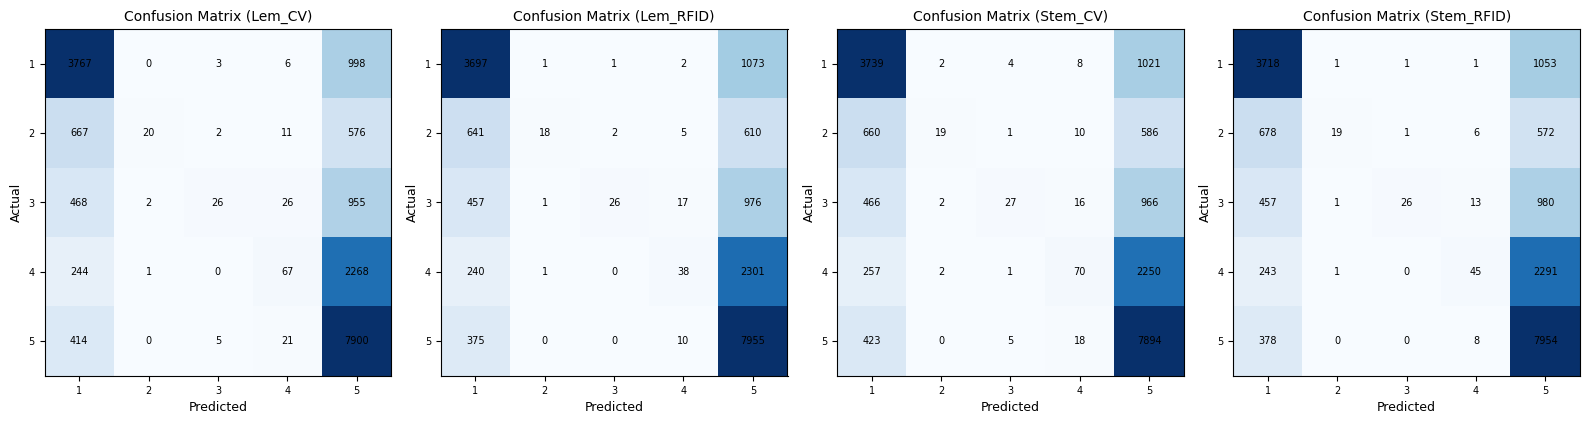

Lem_CV: Train Accuracy - 0.9988, Test Accuracy - 0.6386
Lem_TFIDF: Train Accuracy - 0.9988, Test Accuracy - 0.6361
Stem_CV: Train Accuracy - 0.9987, Test Accuracy - 0.6369
Stem_TFIDF: Train Accuracy - 0.9987, Test Accuracy - 0.6376


In [38]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_rf_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/RFInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_rf_lem_cv, 'Test': accuracy_test_rf_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_rf_lem_rfid, 'Test': accuracy_test_rf_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_rf_stem_cv, 'Test': accuracy_test_rf_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_rf_stem_rfid, 'Test': accuracy_test_rf_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 6. Naive Bayes

In [39]:
# a) Naive Bayes on Lemmatized CountVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_lem_CV_train, y_train)
y_pred_train_nb_lem_cv = nb_model.predict(X_lem_CV_train)
y_pred_test_nb_lem_cv = nb_model.predict(X_lem_CV_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_lem_cv)
nb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_lem_cv)
accuracy_train_nb_lem_cv = accuracy_score(y_train, y_pred_train_nb_lem_cv)
accuracy_test_nb_lem_cv = accuracy_score(y_test, y_pred_test_nb_lem_cv)

# Print results
print("Naive Bayes - Classification Report: Train Data (lem_cv):\n", nb_report_train_lem_cv_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (lem_cv):\n", nb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_nb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_nb_lem_cv)

Naive Bayes - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.70      0.80      0.88      0.75      0.84      0.70     11494
          2       0.72      0.20      0.99      0.31      0.44      0.18      2977
          3       0.61      0.29      0.98      0.39      0.54      0.27      3332
          4       0.55      0.38      0.95      0.45      0.60      0.34      5784
          5       0.73      0.88      0.73      0.80      0.80      0.66     19456

avg / total       0.69      0.70      0.84      0.67      0.74      0.56     43043


Naive Bayes - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.64      0.76      0.85      0.70      0.81      0.64      4774
          2       0.23      0.04      0.99      0.06      0.19      0.03      1276
          3       0.23      0.08      0.98      

In [40]:
# b) Naive Bayes on Lemmatized TFIDFVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_lem_RFID_train, y_train)
y_pred_train_nb_lem_rfid = nb_model.predict(X_lem_RFID_train)
y_pred_test_nb_lem_rfid = nb_model.predict(X_lem_RFID_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_lem_rfid)
nb_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_lem_rfid)
accuracy_train_nb_lem_rfid = accuracy_score(y_train, y_pred_train_nb_lem_rfid)
accuracy_test_nb_lem_rfid = accuracy_score(y_test, y_pred_test_nb_lem_rfid)

# Print results
print("Naive Bayes - Classification Report: Train Data (lem_tfidf):\n", nb_report_train_lem_rfid_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (lem_tfidf):\n", nb_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_nb_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_nb_lem_rfid)

Naive Bayes - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.81      0.63      0.95      0.71      0.77      0.58     11494
          2       0.00      0.00      1.00      0.00      0.00      0.00      2977
          3       0.33      0.00      1.00      0.00      0.02      0.00      3332
          4       0.94      0.00      1.00      0.01      0.05      0.00      5784
          5       0.56      0.99      0.37      0.72      0.61      0.39     19456

avg / total       0.62      0.62      0.70      0.51      0.49      0.33     43043


Naive Bayes - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.78      0.57      0.94      0.66      0.73      0.52      4774
          2       0.00      0.00      1.00      0.00      0.00      0.00      1276
          3       0.00      0.00      1.00

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# c) Naive Bayes on Stemmatized CountVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_stem_CV_train, y_train)
y_pred_train_nb_stem_cv = nb_model.predict(X_stem_CV_train)
y_pred_test_nb_stem_cv = nb_model.predict(X_stem_CV_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_stem_cv)
nb_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_stem_cv)
accuracy_train_nb_stem_cv = accuracy_score(y_train, y_pred_train_nb_stem_cv)
accuracy_test_nb_stem_cv = accuracy_score(y_test, y_pred_test_nb_stem_cv)

# Print results
print("Naive Bayes - Classification Report: Train Data (stem_cv):\n", nb_report_train_stem_cv_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (stem_cv):\n", nb_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_nb_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_nb_stem_cv)

Naive Bayes - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.68      0.78      0.87      0.73      0.83      0.68     11494
          2       0.63      0.18      0.99      0.28      0.42      0.16      2977
          3       0.53      0.29      0.98      0.37      0.53      0.26      3332
          4       0.51      0.36      0.95      0.43      0.59      0.32      5784
          5       0.73      0.86      0.73      0.79      0.79      0.64     19456

avg / total       0.66      0.68      0.83      0.66      0.73      0.54     43043


Naive Bayes - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.63      0.75      0.85      0.69      0.80      0.63      4774
          2       0.23      0.05      0.99      0.08      0.22      0.04      1276
          3       0.24      0.11      0.97    

In [42]:
# d) Naive Bayes on Lemmatized TFIDFVectorized data

# Naive Bayes model
nb_model = MultinomialNB()  # You can customize parameters here if needed
nb_model.fit(X_stem_RFID_train, y_train)
y_pred_train_nb_stem_rfid = nb_model.predict(X_stem_RFID_train)
y_pred_test_nb_stem_rfid = nb_model.predict(X_stem_RFID_test)

# Naive Bayes classification reports and accuracy scores
nb_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_nb_stem_rfid)
nb_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_nb_stem_rfid)
accuracy_train_nb_stem_rfid = accuracy_score(y_train, y_pred_train_nb_stem_rfid)
accuracy_test_nb_stem_rfid = accuracy_score(y_test, y_pred_test_nb_stem_rfid)

# Print results
print("Naive Bayes - Classification Report: Train Data (stem_tfidf):\n", nb_report_train_stem_rfid_imbalanced)
print("\nNaive Bayes - Classification Report: Test Data (stem_tfidf):\n", nb_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_nb_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_nb_stem_rfid)

Naive Bayes - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.80      0.62      0.94      0.70      0.77      0.57     11494
          2       0.25      0.00      1.00      0.00      0.02      0.00      2977
          3       0.33      0.00      1.00      0.00      0.02      0.00      3332
          4       0.96      0.00      1.00      0.01      0.06      0.00      5784
          5       0.56      0.99      0.37      0.72      0.60      0.39     19456

avg / total       0.64      0.61      0.70      0.51      0.49      0.33     43043


Naive Bayes - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.77      0.58      0.94      0.66      0.74      0.53      4774
          2       0.00      0.00      1.00      0.00      0.00      0.00      1276
          3       0.00      0.00      1.

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Summary - Naive Bayes

In [43]:
# a) Lemmatized CountVectorized data
nb_report_train_lem_cv_imbalanced_last = [accuracy_train_nb_lem_cv*100] + [float(value) for value in nb_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
nb_report_test_lem_cv_imbalanced_last = [accuracy_test_nb_lem_cv*100] + [float(value) for value in nb_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_lem_cv_imbalanced = pd.DataFrame([nb_report_train_lem_cv_imbalanced_last, nb_report_test_lem_cv_imbalanced_last], columns=column_names)
final_nb_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_nb_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_nb_report_lem_cv_imbalanced = final_nb_report_lem_cv_imbalanced[['Train/Test'] + column_names]

# b) Lemmatized TFIDFVectorized data
nb_report_train_lem_rfid_imbalanced_last = [accuracy_train_nb_lem_rfid*100] + [float(value) for value in nb_report_train_lem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_lem_rfid_imbalanced_last = [accuracy_test_nb_lem_rfid*100] + [float(value) for value in nb_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_lem_rfid_imbalanced = pd.DataFrame([nb_report_train_lem_rfid_imbalanced_last, nb_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_nb_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_nb_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_nb_report_lem_rfid_imbalanced = final_nb_report_lem_rfid_imbalanced[['Train/Test'] + column_names]

# c) Stemmatized CountVectorized data
nb_report_train_stem_cv_imbalanced_last = [accuracy_train_nb_stem_cv*100] + [float(value) for value in nb_report_train_stem_cv_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_stem_cv_imbalanced_last = [accuracy_test_nb_stem_cv*100] + [float(value) for value in nb_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_stem_cv_imbalanced = pd.DataFrame([nb_report_train_stem_cv_imbalanced_last, nb_report_test_stem_cv_imbalanced_last], columns=column_names)
final_nb_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_nb_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_nb_report_stem_cv_imbalanced = final_nb_report_stem_cv_imbalanced[['Train/Test'] + column_names]

# d) Stemmatized TFIDFVectorized data
nb_report_train_stem_rfid_imbalanced_last = [accuracy_train_nb_stem_rfid*100]+ [float(value) for value in nb_report_train_stem_rfid_imbalanced.split()[-7:]] # Extracting the last 6 values
nb_report_test_stem_rfid_imbalanced_last = [accuracy_test_nb_stem_rfid*100] + [float(value) for value in nb_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_nb_report_stem_rfid_imbalanced = pd.DataFrame([nb_report_train_stem_rfid_imbalanced_last, nb_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_nb_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_nb_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_nb_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_nb_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_nb_report_stem_rfid_imbalanced = final_nb_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Naive Bayes

In [44]:
final_nb_report = pd.concat([final_nb_report_lem_cv_imbalanced,
                    final_nb_report_lem_rfid_imbalanced,
                    final_nb_report_stem_cv_imbalanced,
                    final_nb_report_stem_rfid_imbalanced])

final_nb_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,70.078758,0.69,0.70,0.84,0.67,0.74,0.56,43043.0
Lemmatized Count Vectorized,Test,62.508809,0.56,0.63,0.80,0.58,0.65,0.47,18447.0
Lemmatized TFIDF Vectorized,Train,61.547755,0.62,0.62,0.70,0.51,0.49,0.33,43043.0
Lemmatized TFIDF Vectorized,Test,59.250827,0.45,0.59,0.68,0.49,0.45,0.29,18447.0
Stemmatized Count Vectorized,Train,68.268940,0.66,0.68,0.83,0.66,0.73,0.54,43043.0
Stemmatized Count Vectorized,Test,61.912506,0.56,0.62,0.81,0.58,0.66,0.47,18447.0
Stemmatized TFIDF Vectorized,Train,61.210882,0.64,0.61,0.70,0.51,0.49,0.33,43043.0
Stemmatized TFIDF Vectorized,Test,59.342983,0.59,0.59,0.69,0.49,0.45,0.30,18447.0


### Confusion Matrix for Naive Bayes

[[3629   85  150  165  745]
 [ 616   45  101  137  377]
 [ 429   29  125  308  586]
 [ 281   15   80  640 1564]
 [ 672   19   86  471 7092]]
[[2729    0    0    0 2045]
 [ 344    0    0    0  932]
 [ 197    0    0    0 1280]
 [  77    0    0    0 2503]
 [ 139    0    0    0 8201]]
[[3585  114  174  161  740]
 [ 599   64  121  135  357]
 [ 433   40  156  302  546]
 [ 287   22  107  664 1500]
 [ 756   36   90  506 6952]]
[[2770    0    0    0 2004]
 [ 361    0    0    0  915]
 [ 211    0    0    0 1266]
 [  94    0    0    1 2485]
 [ 164    0    0    0 8176]]


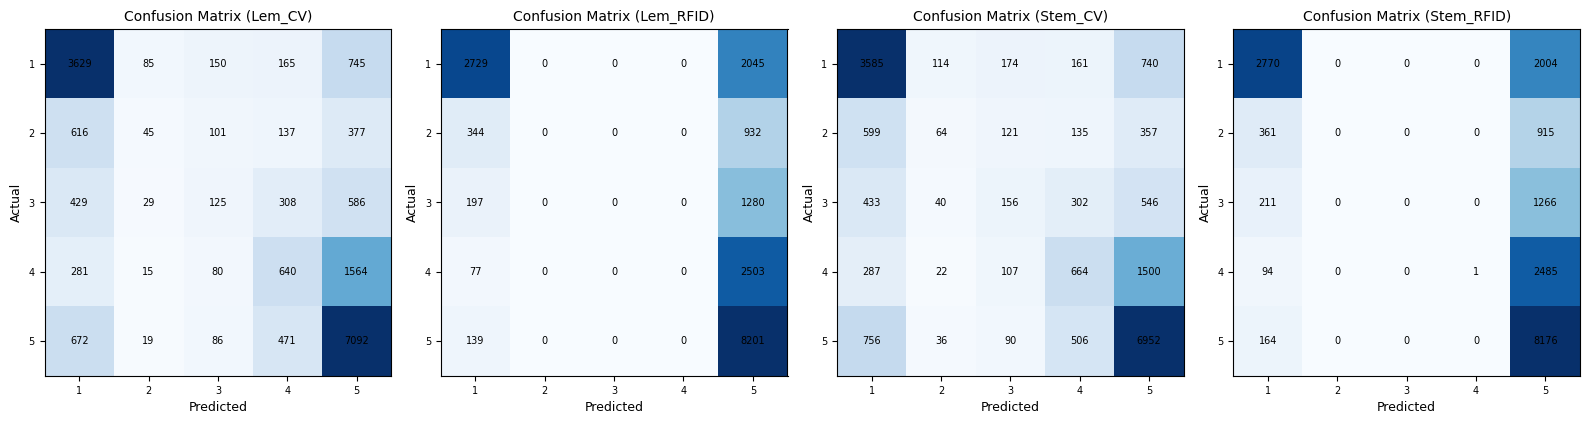

Lem_CV: Train Accuracy - 0.7008, Test Accuracy - 0.6251
Stem_CV: Train Accuracy - 0.6827, Test Accuracy - 0.6191
Lem_TFIDF: Train Accuracy - 0.6155, Test Accuracy - 0.5925
Stem_TFIDF: Train Accuracy - 0.6121, Test Accuracy - 0.5934


In [45]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_nb_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/NBInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_nb_lem_cv, 'Test': accuracy_test_nb_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_nb_lem_rfid, 'Test': accuracy_test_nb_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_nb_stem_cv, 'Test': accuracy_test_nb_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_nb_stem_rfid, 'Test': accuracy_test_nb_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# 7. Gradient Boosting Classifier

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [47]:
# a) XGBoost on Lemmatized CountVectorized data

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_lem_CV_train, y_train_encoded)
y_pred_train_xgb_lem_cv = xgb_model.predict(X_lem_CV_train)
y_pred_test_xgb_lem_cv = xgb_model.predict(X_lem_CV_test)

# XGBoost classification reports and accuracy scores
xgb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_xgb_lem_cv)
xgb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_xgb_lem_cv)
accuracy_train_xgb_lem_cv = accuracy_score(y_train, y_pred_train_xgb_lem_cv)
accuracy_test_xgb_lem_cv = accuracy_score(y_test, y_pred_test_xgb_lem_cv)

# Print results
print("XGBoost - Classification Report: Train Data (lem_cv):\n", xgb_report_train_lem_cv_imbalanced)
print("\nXGBoost - Classification Report: Test Data (lem_cv):\n", xgb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_xgb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_xgb_lem_cv)

XGBoost - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.70      0.00      0.00      0.00         0
          1       0.01      0.00      0.97      0.00      0.02      0.00     11494
          2       0.02      0.01      0.97      0.01      0.09      0.01      2977
          3       0.06      0.05      0.93      0.06      0.22      0.04      3332
          4       0.12      0.51      0.41      0.19      0.46      0.21      5784
          5       0.00      0.00      1.00      0.00      0.00      0.00     19456

avg / total       0.02      0.07      0.91      0.03      0.09      0.03     43043


XGBoost - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      0.69      0.00      0.00      0.00         0
          1       0.27      0.01      0.99      0.02    

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [48]:
# a) HistGradientBoosting Classifier on Lemmatized CountVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_lem_CV_train_dense, y_train)
y_pred_train_hist_gb_lem_cv = hist_gb_model.predict(X_lem_CV_train_dense)
y_pred_test_hist_gb_lem_cv = hist_gb_model.predict(X_lem_CV_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_lem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_lem_cv)
hist_gb_report_test_lem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_lem_cv)
accuracy_train_hist_gb_lem_cv = accuracy_score(y_train, y_pred_train_hist_gb_lem_cv)
accuracy_test_hist_gb_lem_cv = accuracy_score(y_test, y_pred_test_hist_gb_lem_cv)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (lem_cv):\n", hist_gb_report_train_lem_cv_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (lem_cv):\n", hist_gb_report_test_lem_cv_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_hist_gb_lem_cv)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_hist_gb_lem_cv)

HistGradientBoosting - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.87      0.89      0.81      0.88      0.78     11494
          2       0.91      0.28      1.00      0.43      0.53      0.26      2977
          3       0.83      0.34      0.99      0.48      0.58      0.31      3332
          4       0.71      0.39      0.98      0.50      0.62      0.36      5784
          5       0.75      0.94      0.75      0.83      0.84      0.71     19456

avg / total       0.76      0.75      0.85      0.73      0.78      0.62     43043


HistGradientBoosting - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.81      0.86      0.73      0.84      0.70      4774
          2       0.27      0.04      0.99      0.07      0.20      0.04      1276
          3       0.34      0.

In [49]:
# b) HistGradientBoosting Classifier on Lemmatized TFIDFVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_lem_RFID_train_dense, y_train)
y_pred_train_hist_gb_lem_rfid = hist_gb_model.predict(X_lem_RFID_train_dense)
y_pred_test_hist_gb_lem_rfid = hist_gb_model.predict(X_lem_RFID_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_lem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_lem_rfid)
hist_gb_report_test_lem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_lem_rfid)
accuracy_train_hist_gb_lem_rfid = accuracy_score(y_train, y_pred_train_hist_gb_lem_rfid)
accuracy_test_hist_gb_lem_rfid = accuracy_score(y_test, y_pred_test_hist_gb_lem_rfid)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (lem_tfidf):\n", hist_gb_report_train_lem_rfid_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (lem_tfidf):\n", hist_gb_report_test_lem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (lem_tfidf):", accuracy_train_hist_gb_lem_rfid)
print("Accuracy Score: Test Data (lem_tfidf):", accuracy_test_hist_gb_lem_rfid)

HistGradientBoosting - Classification Report: Train Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.89      0.90      0.82      0.89      0.80     11494
          2       0.93      0.35      1.00      0.51      0.59      0.32      2977
          3       0.86      0.39      0.99      0.53      0.62      0.36      3332
          4       0.74      0.43      0.98      0.54      0.65      0.40      5784
          5       0.77      0.94      0.77      0.85      0.85      0.73     19456

avg / total       0.78      0.77      0.87      0.75      0.80      0.65     43043


HistGradientBoosting - Classification Report: Test Data (lem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.67      0.82      0.86      0.74      0.84      0.70      4774
          2       0.26      0.04      0.99      0.07      0.20      0.04      1276
          3       0.34  

In [50]:
# c) HistGradientBoosting Classifier on Stemmatized CountVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_stem_CV_train_dense, y_train)
y_pred_train_hist_gb_stem_cv = hist_gb_model.predict(X_stem_CV_train_dense)
y_pred_test_hist_gb_stem_cv = hist_gb_model.predict(X_stem_CV_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_stem_cv_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_stem_cv)
hist_gb_report_test_stem_cv_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_stem_cv)
accuracy_train_hist_gb_stem_cv = accuracy_score(y_train, y_pred_train_hist_gb_stem_cv)
accuracy_test_hist_gb_stem_cv = accuracy_score(y_test, y_pred_test_hist_gb_stem_cv)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (stem_cv):\n", hist_gb_report_train_stem_cv_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (stem_cv):\n", hist_gb_report_test_stem_cv_imbalanced)
print("\nAccuracy Score: Train Data (stem_cv):", accuracy_train_hist_gb_stem_cv)
print("Accuracy Score: Test Data (stem_cv):", accuracy_test_hist_gb_stem_cv)

HistGradientBoosting - Classification Report: Train Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.75      0.87      0.89      0.80      0.88      0.78     11494
          2       0.92      0.29      1.00      0.44      0.54      0.27      2977
          3       0.84      0.33      0.99      0.48      0.58      0.31      3332
          4       0.71      0.40      0.97      0.51      0.62      0.36      5784
          5       0.75      0.93      0.75      0.83      0.84      0.71     19456

avg / total       0.76      0.75      0.85      0.73      0.78      0.62     43043


HistGradientBoosting - Classification Report: Test Data (stem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.81      0.85      0.73      0.83      0.69      4774
          2       0.26      0.04      0.99      0.07      0.19      0.03      1276
          3       0.36      

In [51]:
# d) HistGradientBoosting Classifier on Stemmatized TFIDFVectorized data

# HistGradientBoosting model
hist_gb_model = HistGradientBoostingClassifier()  # You can customize parameters here if needed
hist_gb_model.fit(X_stem_RFID_train_dense, y_train)
y_pred_train_hist_gb_stem_rfid = hist_gb_model.predict(X_stem_RFID_train_dense)
y_pred_test_hist_gb_stem_rfid = hist_gb_model.predict(X_stem_RFID_test_dense)

# HistGradientBoosting classification reports and accuracy scores
hist_gb_report_train_stem_rfid_imbalanced = classification_report_imbalanced(y_train, y_pred_train_hist_gb_stem_rfid)
hist_gb_report_test_stem_rfid_imbalanced = classification_report_imbalanced(y_test, y_pred_test_hist_gb_stem_rfid)
accuracy_train_hist_gb_stem_rfid = accuracy_score(y_train, y_pred_train_hist_gb_stem_rfid)
accuracy_test_hist_gb_stem_rfid = accuracy_score(y_test, y_pred_test_hist_gb_stem_rfid)

# Print results
print("HistGradientBoosting - Classification Report: Train Data (stem_tfidf):\n", hist_gb_report_train_stem_rfid_imbalanced)
print("\nHistGradientBoosting - Classification Report: Test Data (stem_tfidf):\n", hist_gb_report_test_stem_rfid_imbalanced)
print("\nAccuracy Score: Train Data (stem_tfidf):", accuracy_train_hist_gb_stem_rfid)
print("Accuracy Score: Test Data (stem_tfidf):", accuracy_test_hist_gb_stem_rfid)

HistGradientBoosting - Classification Report: Train Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.76      0.89      0.90      0.82      0.89      0.80     11494
          2       0.93      0.35      1.00      0.51      0.59      0.32      2977
          3       0.85      0.40      0.99      0.54      0.63      0.37      3332
          4       0.75      0.43      0.98      0.55      0.65      0.40      5784
          5       0.77      0.94      0.77      0.85      0.85      0.73     19456

avg / total       0.78      0.77      0.87      0.75      0.80      0.65     43043


HistGradientBoosting - Classification Report: Test Data (stem_tfidf):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.81      0.86      0.73      0.83      0.69      4774
          2       0.30      0.05      0.99      0.09      0.22      0.05      1276
          3       0.37

## Summary - Gradient Boosting

In [52]:
# a) Lemmatized CountVectorized data
hist_gb_report_train_lem_cv_imbalanced_last = [accuracy_train_hist_gb_lem_cv * 100] + [float(value) for value in hist_gb_report_train_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_lem_cv_imbalanced_last = [accuracy_test_hist_gb_lem_cv * 100] + [float(value) for value in hist_gb_report_test_lem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_lem_cv_imbalanced = pd.DataFrame([hist_gb_report_train_lem_cv_imbalanced_last, hist_gb_report_test_lem_cv_imbalanced_last], columns=column_names)
final_hist_gb_report_lem_cv_imbalanced['Data Type'] = ['Lemmatized Count Vectorized', 'Lemmatized Count Vectorized']
final_hist_gb_report_lem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_lem_cv_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_lem_cv_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_lem_cv_imbalanced = final_hist_gb_report_lem_cv_imbalanced[['Train/Test'] + column_names]

# b) Lemmatized TFIDFVectorized data
hist_gb_report_train_lem_rfid_imbalanced_last = [accuracy_train_hist_gb_lem_rfid * 100] + [float(value) for value in hist_gb_report_train_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_lem_rfid_imbalanced_last = [accuracy_test_hist_gb_lem_rfid * 100] + [float(value) for value in hist_gb_report_test_lem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_lem_rfid_imbalanced = pd.DataFrame([hist_gb_report_train_lem_rfid_imbalanced_last, hist_gb_report_test_lem_rfid_imbalanced_last], columns=column_names)
final_hist_gb_report_lem_rfid_imbalanced['Data Type'] = ['Lemmatized TFIDF Vectorized', 'Lemmatized TFIDF Vectorized']
final_hist_gb_report_lem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_lem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_lem_rfid_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_lem_rfid_imbalanced = final_hist_gb_report_lem_rfid_imbalanced[['Train/Test'] + column_names]

# c) Stemmatized CountVectorized data
hist_gb_report_train_stem_cv_imbalanced_last = [accuracy_train_hist_gb_stem_cv * 100] + [float(value) for value in hist_gb_report_train_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_stem_cv_imbalanced_last = [accuracy_test_hist_gb_stem_cv * 100] + [float(value) for value in hist_gb_report_test_stem_cv_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_stem_cv_imbalanced = pd.DataFrame([hist_gb_report_train_stem_cv_imbalanced_last, hist_gb_report_test_stem_cv_imbalanced_last], columns=column_names)
final_hist_gb_report_stem_cv_imbalanced['Data Type'] = ['Stemmatized Count Vectorized', 'Stemmatized Count Vectorized']
final_hist_gb_report_stem_cv_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_stem_cv_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_stem_cv_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_stem_cv_imbalanced = final_hist_gb_report_stem_cv_imbalanced[['Train/Test'] + column_names]

# d) Stemmatized TFIDFVectorized data
hist_gb_report_train_stem_rfid_imbalanced_last = [accuracy_train_hist_gb_stem_rfid * 100] + [float(value) for value in hist_gb_report_train_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
hist_gb_report_test_stem_rfid_imbalanced_last = [accuracy_test_hist_gb_stem_rfid * 100] + [float(value) for value in hist_gb_report_test_stem_rfid_imbalanced.split()[-7:]]  # Extracting the last 6 values
column_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'Geometric Mean', 'Index Balanced Accuracy (IBA)', 'Support']
final_hist_gb_report_stem_rfid_imbalanced = pd.DataFrame([hist_gb_report_train_stem_rfid_imbalanced_last, hist_gb_report_test_stem_rfid_imbalanced_last], columns=column_names)
final_hist_gb_report_stem_rfid_imbalanced['Data Type'] = ['Stemmatized TFIDF Vectorized', 'Stemmatized TFIDF Vectorized']
final_hist_gb_report_stem_rfid_imbalanced['Train/Test'] = ['Train', 'Test']

# Set 'Data Type' column as the index and drop the index column
final_hist_gb_report_stem_rfid_imbalanced.set_index('Data Type', inplace=True)
final_hist_gb_report_stem_rfid_imbalanced.index.name = None

# Reorder columns
final_hist_gb_report_stem_rfid_imbalanced = final_hist_gb_report_stem_rfid_imbalanced[['Train/Test'] + column_names]


### Averaged classification report for Histogram Gradient Boosting Classifier

In [53]:
final_hist_gb_report = pd.concat([final_hist_gb_report_lem_cv_imbalanced,
                    final_hist_gb_report_lem_rfid_imbalanced,
                    final_hist_gb_report_stem_cv_imbalanced,
                    final_hist_gb_report_stem_rfid_imbalanced])

final_hist_gb_report.head(8)

,Train/Test,Accuracy,Precision,Recall,Specificity,F1-Score,Geometric Mean,Index Balanced Accuracy (IBA),Support
Lemmatized Count Vectorized,Train,75.410636,0.76,0.75,0.85,0.73,0.78,0.62,43043.0
Lemmatized Count Vectorized,Test,66.070364,0.60,0.66,0.81,0.61,0.68,0.50,18447.0
Lemmatized TFIDF Vectorized,Train,77.325001,0.78,0.77,0.87,0.75,0.80,0.65,43043.0
Lemmatized TFIDF Vectorized,Test,65.940261,0.60,0.66,0.82,0.61,0.68,0.51,18447.0
Stemmatized Count Vectorized,Train,75.389727,0.76,0.75,0.85,0.73,0.78,0.62,43043.0
Stemmatized Count Vectorized,Test,65.907736,0.60,0.66,0.81,0.60,0.67,0.50,18447.0
Stemmatized TFIDF Vectorized,Train,77.308738,0.78,0.77,0.87,0.75,0.80,0.65,43043.0
Stemmatized TFIDF Vectorized,Test,65.967366,0.60,0.66,0.82,0.61,0.68,0.51,18447.0


### Confusion Matrix for Histogram Gradient Boosting

[[3883   66   72   91  662]
 [ 696   52   64  105  359]
 [ 481   39  133  257  567]
 [ 251   17   68  638 1606]
 [ 496   20   53  289 7482]]
[[3903   74   74  124  599]
 [ 709   54   59  124  330]
 [ 476   37  135  278  551]
 [ 254   19   84  629 1594]
 [ 502   21   50  324 7443]]
[[3864   65   67  105  673]
 [ 721   48   70  104  333]
 [ 503   38  139  248  549]
 [ 279   20   71  613 1597]
 [ 508   17   39  282 7494]]
[[3885   73   78  116  622]
 [ 708   64   61  106  337]
 [ 476   31  158  265  547]
 [ 271   18   79  625 1587]
 [ 521   24   56  302 7437]]


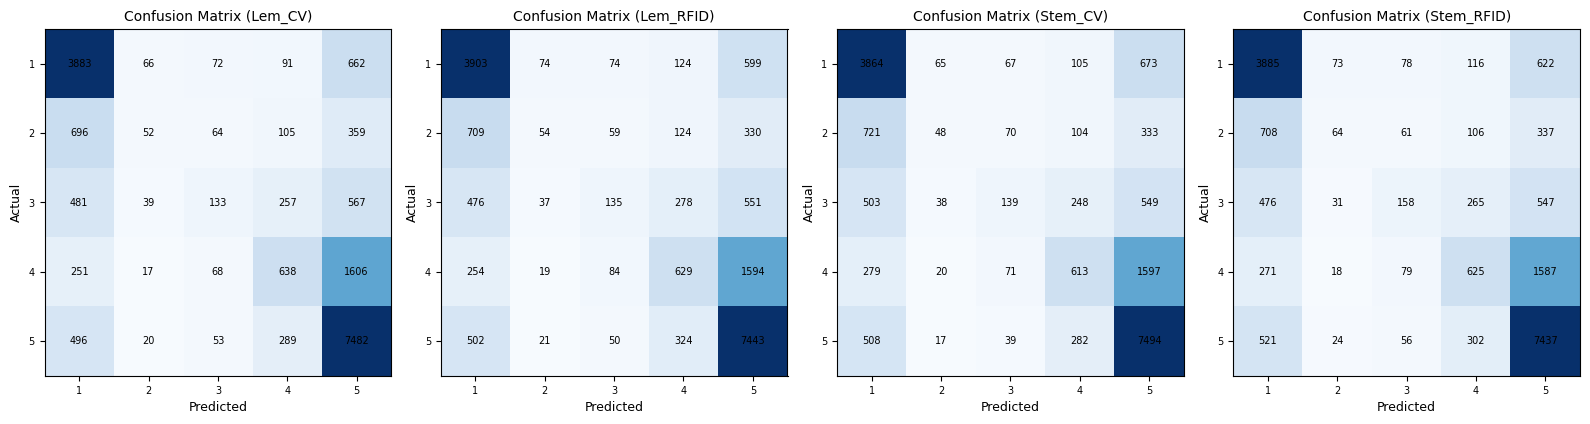

Lem_TFIDF: Train Accuracy - 0.7733, Test Accuracy - 0.6594
Stem_TFIDF: Train Accuracy - 0.7731, Test Accuracy - 0.6597
Lem_CV: Train Accuracy - 0.7541, Test Accuracy - 0.6607
Stem_CV: Train Accuracy - 0.7539, Test Accuracy - 0.6591


In [54]:
combinations = ['Lem_CV', 'Lem_RFID', 'Stem_CV', 'Stem_RFID']

plt.figure(figsize=(16, 4))

for i, combination in enumerate(combinations, 1):
    plt.subplot(1, 4, i)
    
    # Get y_test and y_pred_test for the current combination
    y_test_comb = globals()[f"y_test"]
    y_pred_test_comb = globals()[f"y_pred_test_hist_gb_{combination.lower()}"]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test_comb, y_pred_test_comb)

    print(cm)
    
    # Plotting Confusion Matrix using imshow
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=3000)  # Adjust vmax as needed
    
    # Adding annotations
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)
    
    plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
    plt.title(f'Confusion Matrix ({combination})', fontsize=10)
    plt.xlabel('Predicted', fontsize=9)
    plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
# plt.savefig('../../images/HGBCInitConfMatrix.png')
plt.show()

accuracy_scores = {
    'Lem_CV': {'Train': accuracy_train_hist_gb_lem_cv, 'Test': accuracy_test_hist_gb_lem_cv},
    'Lem_TFIDF': {'Train': accuracy_train_hist_gb_lem_rfid, 'Test': accuracy_test_hist_gb_lem_rfid},
    'Stem_CV': {'Train': accuracy_train_hist_gb_stem_cv, 'Test': accuracy_test_hist_gb_stem_cv},
    'Stem_TFIDF': {'Train': accuracy_train_hist_gb_stem_rfid, 'Test': accuracy_test_hist_gb_stem_rfid},
}

# Sorting based on the test accuracy
sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1]['Train'], reverse=True)

# Displaying the sorted results
for combination, scores in sorted_accuracy_scores:
    print(f"{combination}: Train Accuracy - {scores['Train']:.4f}, Test Accuracy - {scores['Test']:.4f}")

# ---------